In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it

In [6]:
def print_network_chars(G):
    vertex_degrees = list(dict(nx.degree(G)).values()) 
    plt.hist(vertex_degrees, bins = np.linspace(0, 1000, 40),
            facecolor='blue', alpha=0.75, rwidth = 0.9) 
    plt.title("Vertex degree distribution") 
    plt.grid(True)
    plt.show()
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    CC = nx.average_clustering(G) 
    print("|V| =", n)
    print("|E| =", m)
    print("Average degree is", 2 * m / n) 
    print("CC =", CC)
    print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(G).todense()**3))/6))
    return None

In [7]:
def splitn(n,g):
    listofsubgraphs = [1]*g
    for _ in range(n-g):
        listofsubgraphs[int(np.cbrt(np.random.randint(g**(3))))] += 1 #using y=x**2 to form a biased distribution
    for i in range(len(listofsubgraphs)-2,-1,-2):
        listofsubgraphs += [listofsubgraphs.pop(i)] #sort to get largest subgraphs to be in the middle
    return listofsubgraphs

def wsmatrix(n, l, p):
    k = int(n*(l**(n//500+1))/2)*2
    B = (np.arange(n).reshape(n, 1) - np.arange(n).reshape(1, n)) % n
    A = 1 * (((B >= 1) & (B <= k/2)) | ((B >= n - k/2) & (B <= n-1)))
    for i in range(n):
        v_maybe_rewired = (i + np.arange(1, k //2 +1)) % n
        v_rewired = v_maybe_rewired[np.random.rand(k // 2) < p]
        v_maybe_rewired_to = np.where((A[i, :] == 0) & (np.arange(n) != i))[0]
        v_rewired_to = np.random.choice(v_maybe_rewired_to, len(v_rewired), replace = False)
        A[v_rewired, i] = 0
        A[i, v_rewired] = 0
        A[v_rewired_to, i] = 1
        A[i, v_rewired_to] = 1
    return A

def customrandomgraph(n, g, l, p, q):
    if n < g or p > 1 or q > 1:
        return 'error'
    else: n = splitn(n,g)
    ws = [wsmatrix(i,l,p) for i in n]
    listofclusters = [[] for i in range(g)]
    for h in range(g**2):
        i = h//g
        j = h%g
        if j == i:
            listofclusters[i] += [ws[i]]
        else:   
            distance = min(j-i,g-j+i)
            listofclusters[i] += [1*(np.random.rand(n[i],n[j]) < (q/distance**2))]
    A = np.triu(np.concatenate([np.concatenate(m,1) for m in listofclusters]))
    custommatrix = np.mat(A + A.T)
    return nx.Graph(custommatrix) 

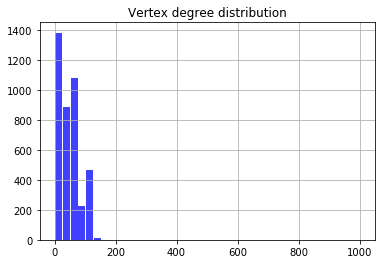

|V| = 4039
|E| = 108380
Average degree is 53.66674919534538
CC = 0.5572392851761166
Number of triangles =  1484292.0


/Users/George/Desktop/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/George/Desktop/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/George/Desktop/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/George/Desktop/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

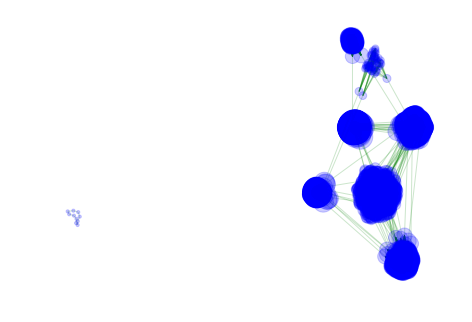

In [8]:
G = customrandomgraph(4039, 8, 0.259, 0.09, 0.00002)

print_network_chars(G)

nx.draw(G, node_size = [v * 5 for v in dict(nx.degree(G)).values()],
        node_color = 'blue', alpha = 0.2, edge_color = 'green')
plt.show()